In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/anshs/Desktop/Air Quality Dataset/Air Quality Dataset/city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


NULL VALUES REMOVAL


In [5]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
df['NO'].dtype

dtype('float64')

In [7]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [8]:
df.drop(columns=['City','Date'],inplace=True)

In [9]:
x = df.drop(columns = ['AQI_Bucket'])
y = df['AQI_Bucket']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=42)

In [11]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3,weights='distance')
x_train_PM2= knn.fit_transform(x_train[['PM2.5']])



In [12]:
x_train_PM2

array([[67.37049831],
       [45.53      ],
       [21.08      ],
       ...,
       [67.37049831],
       [36.08      ],
       [65.29      ]])

In [13]:
x_train_PM10= knn.fit_transform(x_train[['PM10']])
x_train_PM10

array([[117.2458901],
       [150.21     ],
       [117.2458901],
       ...,
       [117.2458901],
       [ 95.82     ],
       [121.72     ]])

In [14]:
df.isnull().sum()

PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [15]:
x_train_no = knn.fit_transform(x_train[['NO']])
x_train_no

array([[17.59495196],
       [ 3.5       ],
       [17.59      ],
       ...,
       [17.59495196],
       [ 5.67      ],
       [23.97      ]])

In [16]:
x_train_nox = knn.fit_transform(x_train[['NOx']])
x_train_nox

array([[16.48      ],
       [27.74      ],
       [ 4.22      ],
       ...,
       [32.43438442],
       [18.75      ],
       [59.59      ]])

In [17]:
x_train_no2 = knn.fit_transform(x_train[['NO2']])
x_train_no2

array([[28.55508378],
       [48.13      ],
       [10.27      ],
       ...,
       [28.55508378],
       [31.21      ],
       [36.28      ]])

In [18]:
x_train_nh3 = knn.fit_transform(x_train[['NH3']])
x_train_nh3

array([[23.29500186],
       [12.68      ],
       [23.29500186],
       ...,
       [23.29500186],
       [15.34      ],
       [34.63      ]])

In [19]:
x_train_co2 = knn.fit_transform(x_train[['CO']])
x_train_co2

array([[0.        ],
       [0.11      ],
       [1.51      ],
       ...,
       [2.27401164],
       [0.7       ],
       [1.01      ]])

In [20]:
x_train_so2 = knn.fit_transform(x_train[['SO2']])
x_train_so2

array([[14.51018888],
       [11.82      ],
       [ 8.69      ],
       ...,
       [14.51018888],
       [ 5.92      ],
       [ 9.91      ]])

In [21]:
x_train_o3 = knn.fit_transform(x_train[['O3']])
x_train_o3

array([[34.41342217],
       [33.44      ],
       [21.76      ],
       ...,
       [34.41342217],
       [48.88      ],
       [19.03      ]])

In [22]:
df.isnull().sum()

PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [23]:
x_train_benzene = knn.fit_transform(x_train[['Benzene']])
x_train_benzene

array([[0.        ],
       [3.03      ],
       [0.14      ],
       ...,
       [3.31171918],
       [0.88      ],
       [6.79      ]])

In [24]:
x_train_toluene = knn.fit_transform(x_train[['Toluene']])
x_train_toluene

array([[ 0.        ],
       [10.55      ],
       [ 0.22      ],
       ...,
       [ 8.73853611],
       [ 3.81      ],
       [ 8.73853611]])

In [25]:
x_train_no2 = knn.fit_transform(x_train[['NO2']])
x_train_no2

array([[28.55508378],
       [48.13      ],
       [10.27      ],
       ...,
       [28.55508378],
       [31.21      ],
       [36.28      ]])

In [26]:
df.isnull().sum()

PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

Text(0, 0.5, 'Weather')

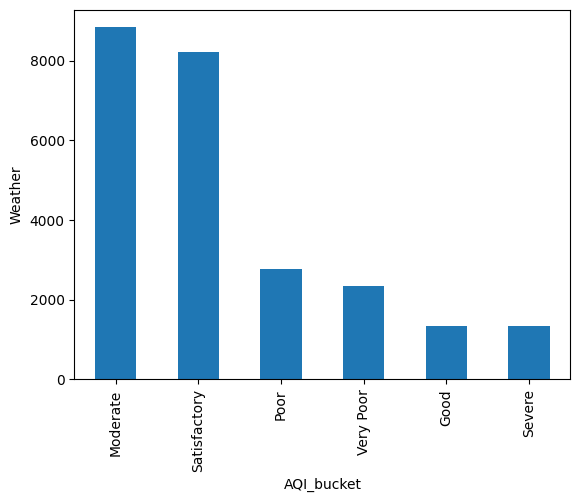

In [27]:
df['AQI_Bucket'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('AQI_bucket')
plt.ylabel('Weather')

Text(0.5, 1.0, 'AQI')

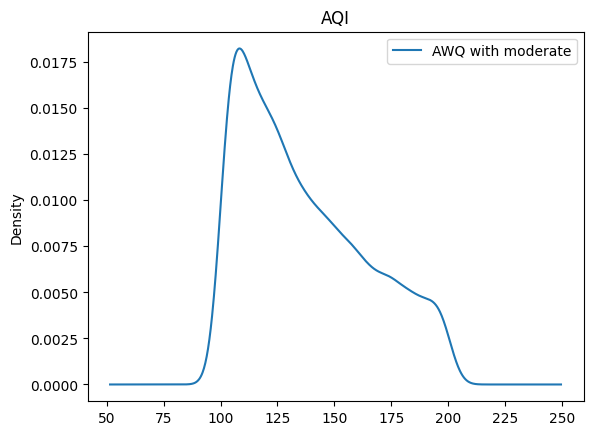

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['AQI_Bucket']=='Moderate']['AQI'].plot(kind = 'kde',ax=ax)



lines,labels = ax.get_legend_handles_labels()
labels = ['AWQ with moderate','AQI with NA']
ax.legend(lines,labels,loc = 'best')

plt.title('AQI')


In [29]:
from sklearn.impute import SimpleImputer

In [30]:
from sklearn.compose import ColumnTransformer
clf = ColumnTransformer(transformers= [('tnf1', KNNImputer(),['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']),],remainder='passthrough')

In [31]:
x_train = clf.fit_transform(x_train)

In [32]:
x_train = pd.DataFrame(x_train,columns = x.columns)

In [33]:
x

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


In [34]:
x_train

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,66.596000,164.87800,10.476000,10.206000,16.480000,6.600000,0.000000,6.036000,27.086000,0.000000,0.000000,0.000000,124.600000
1,45.530000,150.21000,3.500000,48.130000,27.740000,12.680000,0.110000,11.820000,33.440000,3.030000,10.550000,1.060000,145.000000
2,21.080000,61.16200,17.590000,10.270000,4.220000,0.222000,1.510000,8.690000,21.760000,0.140000,0.220000,0.000000,75.000000
3,54.950000,287.87600,10.346000,15.632000,68.160000,8.880000,0.000000,12.630000,21.320000,0.000000,0.000000,0.000000,286.200000
4,41.540000,77.54800,6.520000,10.280000,10.120000,7.488000,1.670000,4.900000,55.500000,2.800000,0.450000,0.000000,130.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20666,21.750000,52.25200,7.970000,18.640000,16.240000,2.020000,0.910000,4.190000,26.030000,1.050000,3.610000,0.000000,70.000000
20667,38.060000,74.54000,9.910000,42.230000,22.620000,24.316000,1.040000,3.200000,25.890000,0.000000,0.000000,0.000000,73.000000
20668,67.370498,117.24589,17.594952,28.555084,32.434384,23.295002,2.274012,14.510189,34.413422,3.311719,8.738536,3.153823,166.450147
20669,36.080000,95.82000,5.670000,31.210000,18.750000,15.340000,0.700000,5.920000,48.880000,0.880000,3.810000,0.780000,101.000000


In [35]:
x_test = clf.fit_transform(x_test)

In [36]:
x_test = pd.DataFrame(x_test,columns=x.columns)

In [37]:
x_test

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,70.456,114.910,17.630,20.128,1.394,13.478,0.00,23.178,28.224,0.00,0.182,2.316,91.4
1,70.456,114.910,17.630,20.128,1.394,13.478,0.00,23.178,28.224,0.00,0.182,2.316,91.4
2,58.500,172.394,11.230,17.050,28.290,12.244,1.14,5.130,24.200,0.14,0.640,0.310,137.0
3,78.570,187.466,6.850,5.450,5.570,6.758,1.33,39.860,71.680,1.88,16.320,6.970,190.0
4,200.800,273.410,40.040,50.590,60.420,35.470,1.22,9.710,42.180,0.15,1.190,0.000,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8855,33.992,146.370,7.130,7.230,96.934,6.580,0.46,45.090,5.940,0.00,0.000,0.000,110.0
8856,112.860,167.600,24.600,32.710,45.120,36.050,10.15,19.480,38.450,4.04,9.070,2.420,309.0
8857,33.950,96.610,5.690,22.470,23.260,30.660,0.58,13.380,39.860,1.32,13.810,0.914,83.0
8858,24.140,30.660,8.420,12.380,20.290,34.170,1.05,7.500,68.750,0.17,0.160,0.000,110.0


In [38]:
impute = SimpleImputer(strategy='most_frequent')
y_train = impute.fit_transform([y_train])
y_test = impute.fit_transform([y_test])


c:\Users\anshs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [    0     3    19 ... 20659 20663 20668]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
c:\Users\anshs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [   0    1    6 ... 8836 8850 8851]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [39]:
y

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
29526            Good
29527    Satisfactory
29528    Satisfactory
29529    Satisfactory
29530            Good
Name: AQI_Bucket, Length: 29531, dtype: object

In [40]:
x_train.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [41]:
df['AQI_Bucket'].values

array([nan, nan, nan, ..., 'Satisfactory', 'Satisfactory', 'Good'],
      dtype=object)

Text(0, 0.5, 'Weather')

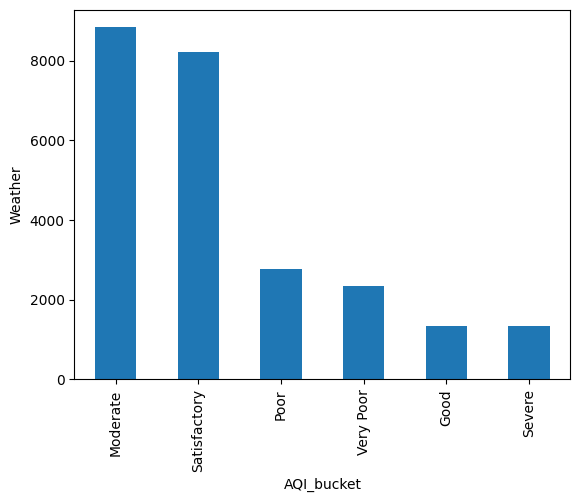

In [42]:
df['AQI_Bucket'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('AQI_bucket')
plt.ylabel('Weather')

In [43]:
y_train

array([['Moderate', 'Satisfactory', 'Moderate', ..., 'Satisfactory',
        'Moderate', 'Moderate']], dtype=object)

In [44]:


# If y_train has a shape (1, 17401), transpose it
if y_train.shape[0] == 1:
    y_train = y_train.T  # Transpose to make it (17401, 1)

# Convert to DataFrame
y_train_df = pd.DataFrame(y_train, columns=['AQI_Bucket'])
y_train_df


,AQI_Bucket
0,Moderate
1,Satisfactory
2,Moderate
3,Satisfactory
4,Poor
...,...
17396,Moderate
17397,Satisfactory
17398,Satisfactory
17399,Moderate


In [45]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['Severe', 'Very Poor', 'Poor', 'Satisfactory', 'Moderate', 'Good']])
y_train = enc.fit_transform(y_train)
y_train


array([[4.],
       [3.],
       [4.],
       ...,
       [3.],
       [4.],
       [4.]])

In [46]:
y_train_df = pd.DataFrame(y_train, columns=['AQI_Bucket'])
y_train_df


,AQI_Bucket
0,4.0
1,3.0
2,4.0
3,3.0
4,2.0
...,...
17396,4.0
17397,3.0
17398,3.0
17399,4.0


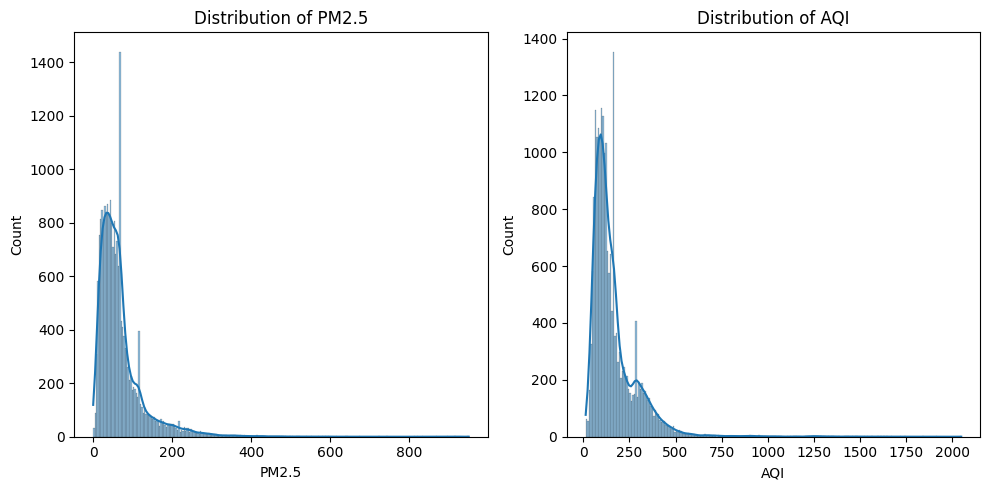

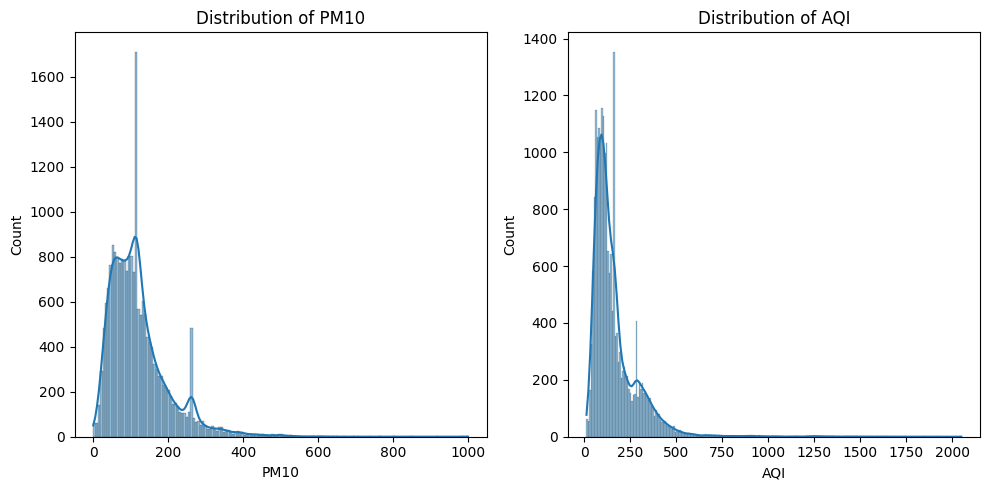

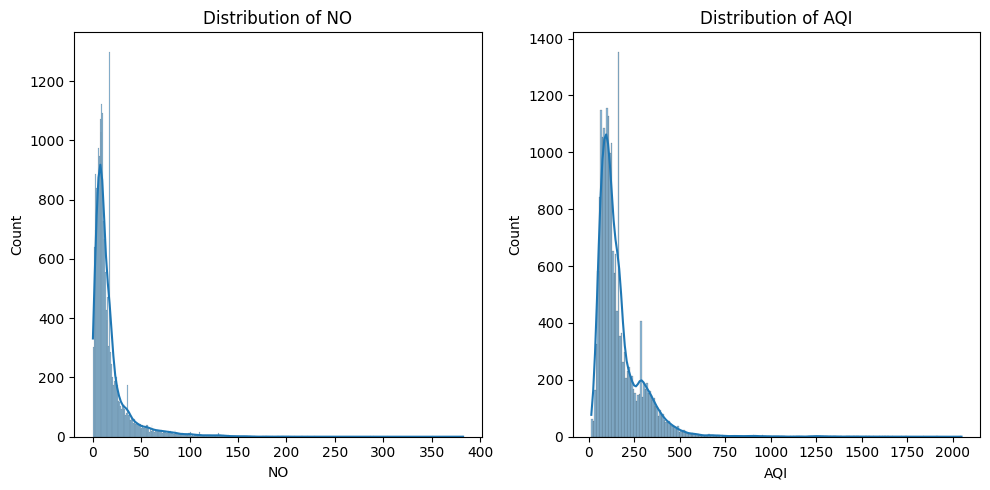

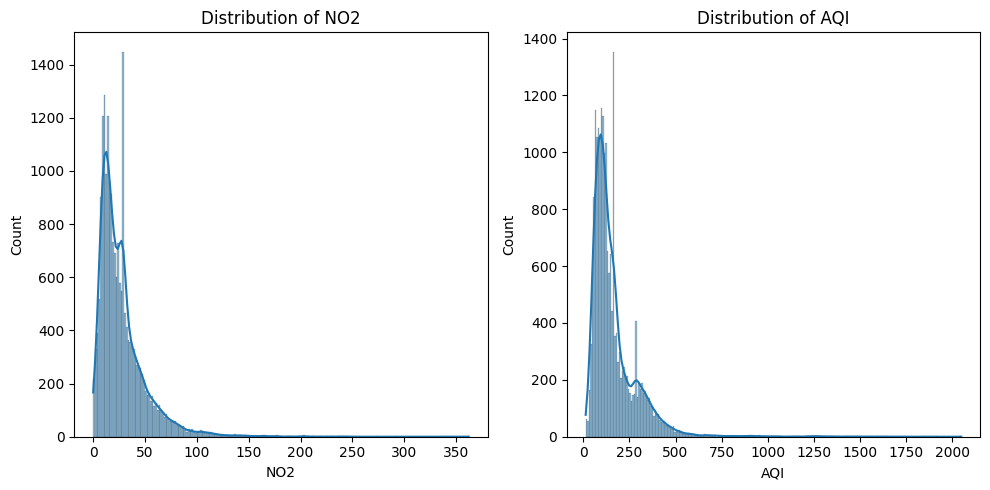

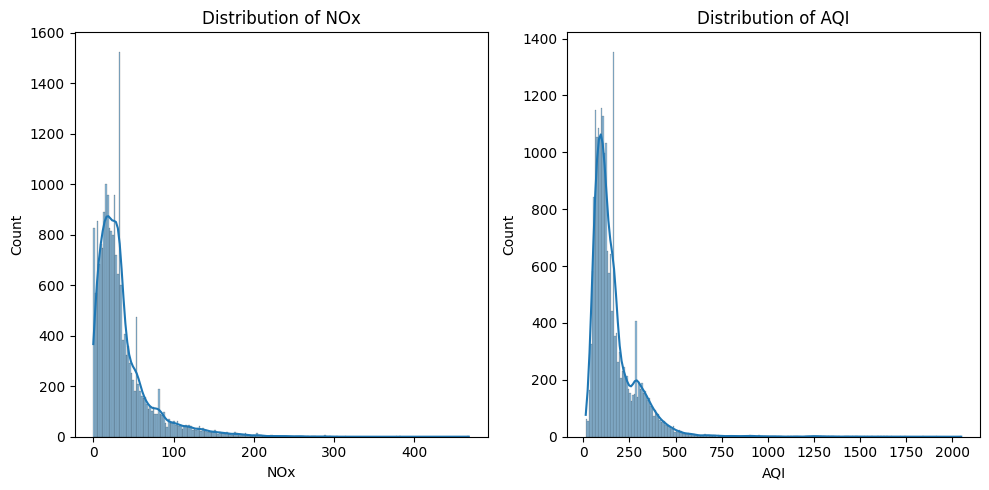

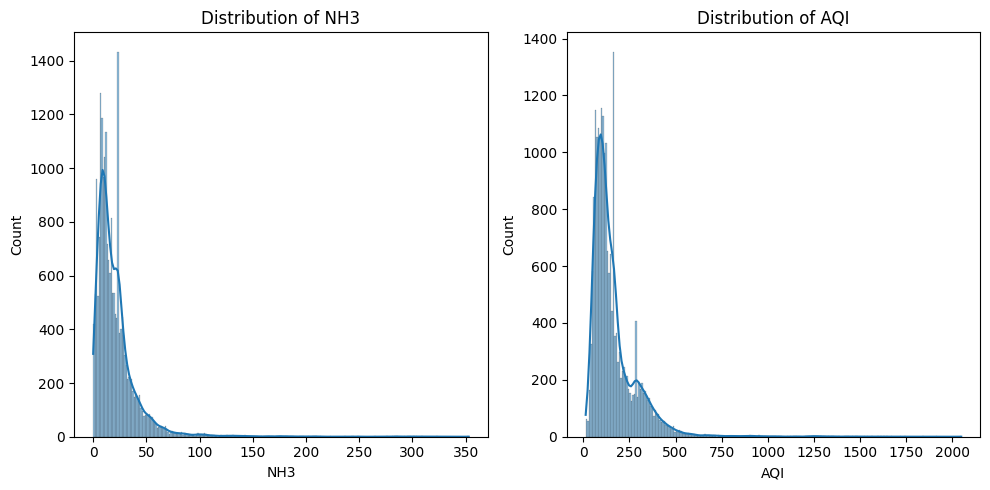

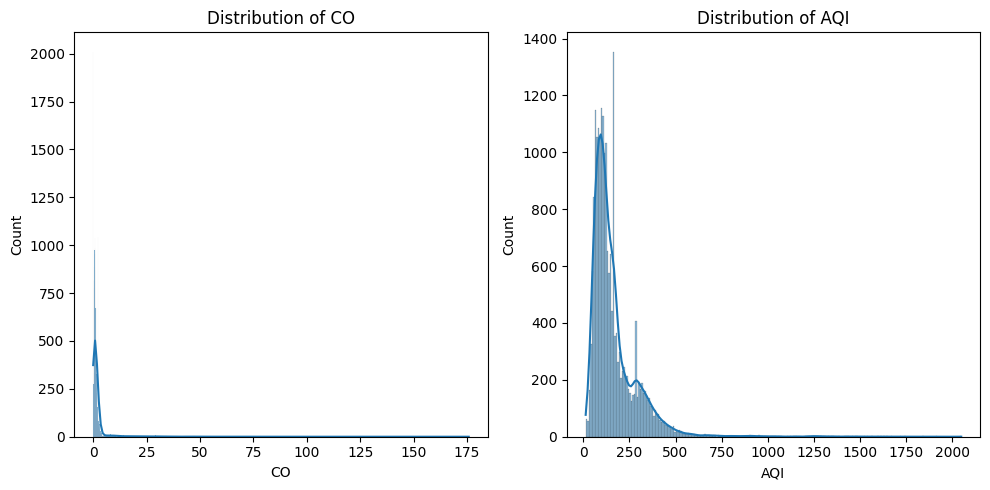

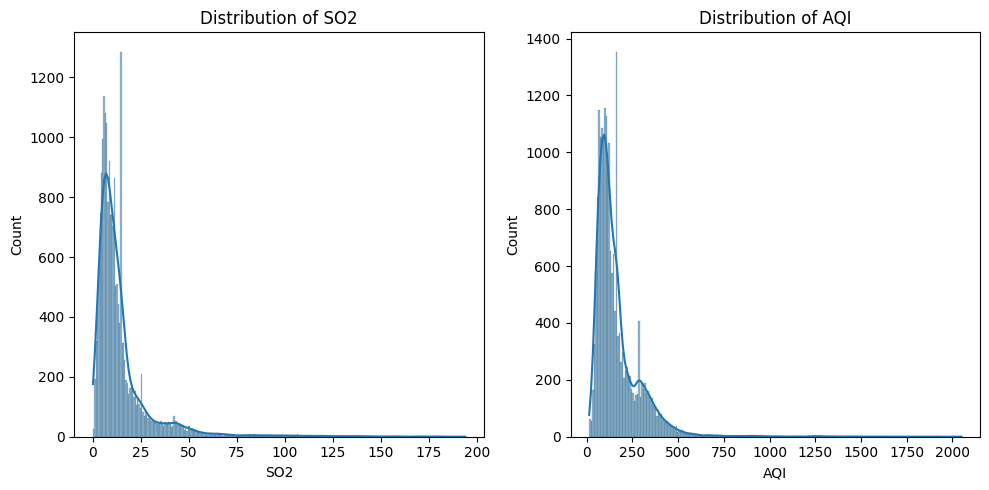

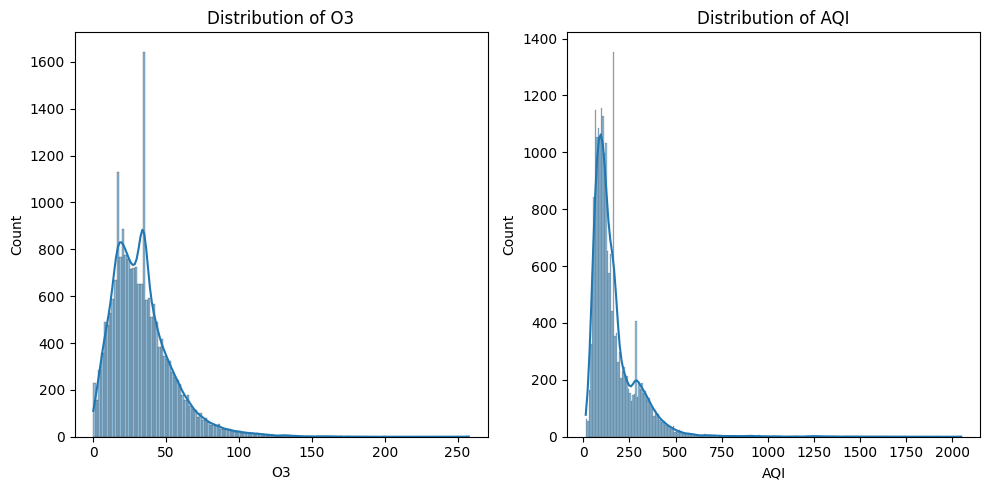

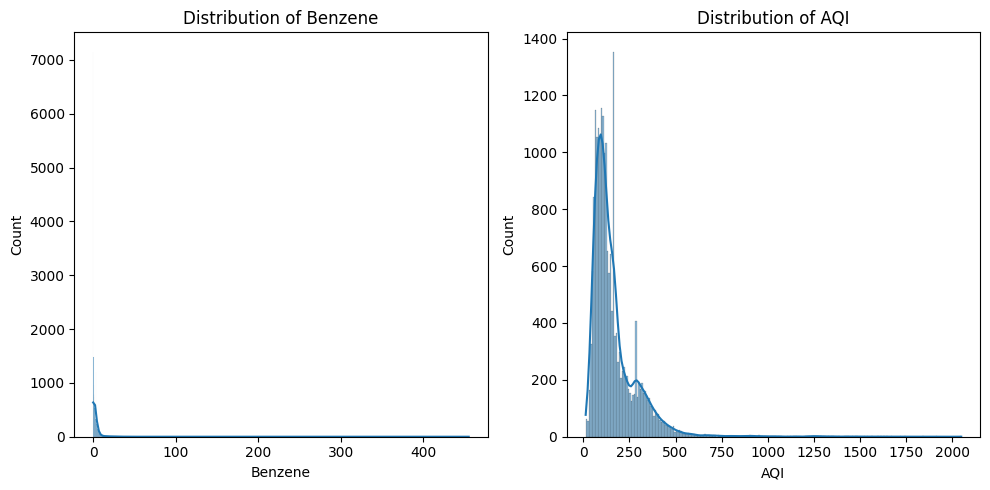

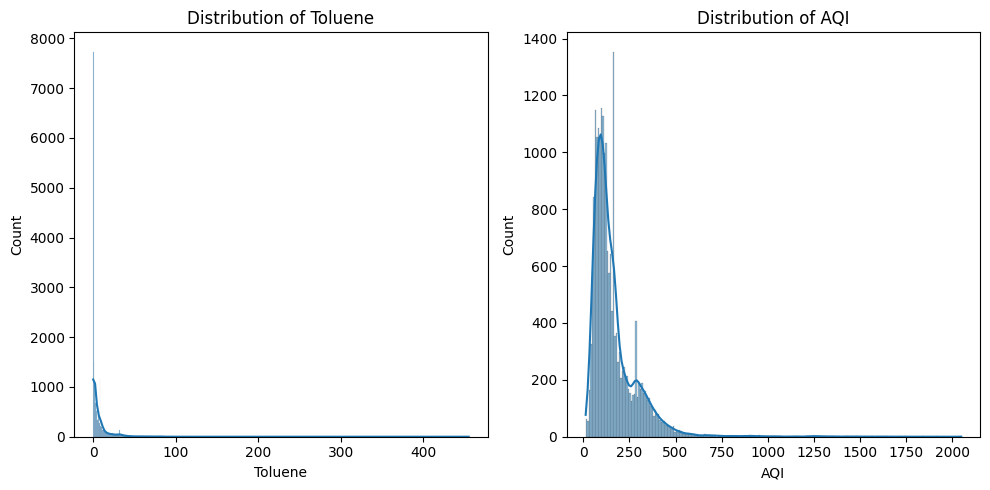

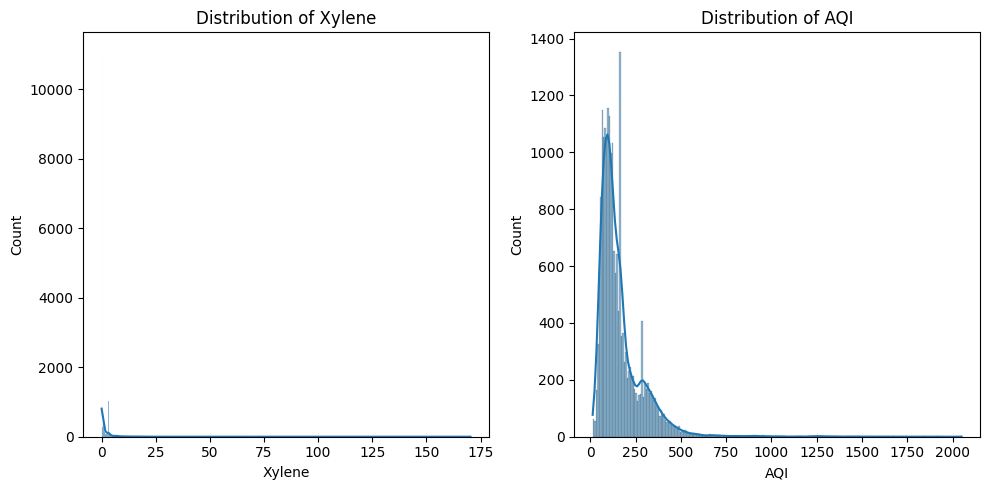

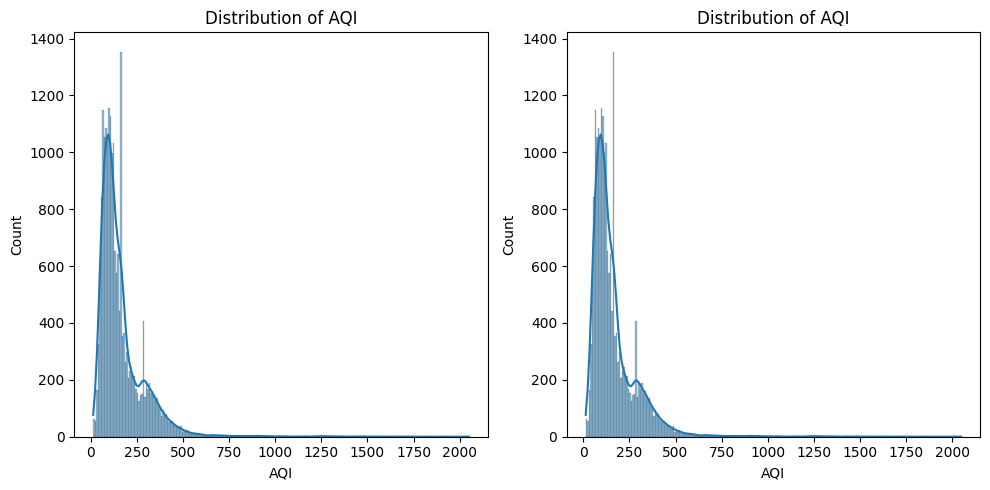

In [55]:
for i in x_train.columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(x_train[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.subplot(1, 2, 2)
    sns.histplot(x_train['AQI'], kde=True)
    plt.title('Distribution of AQI')   
    plt.tight_layout()
    plt.show()


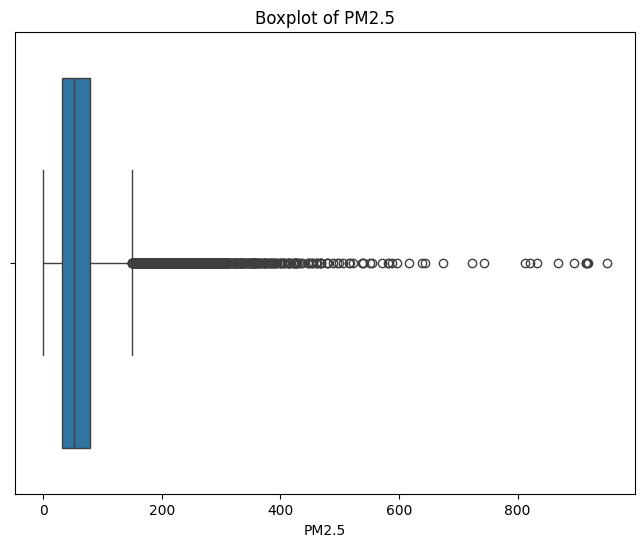

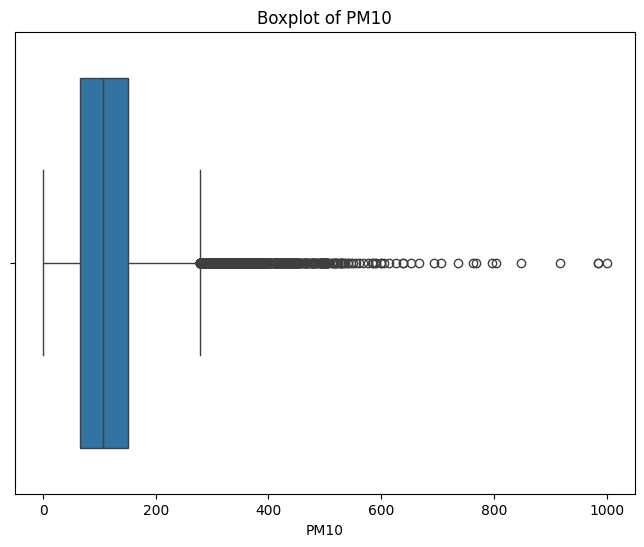

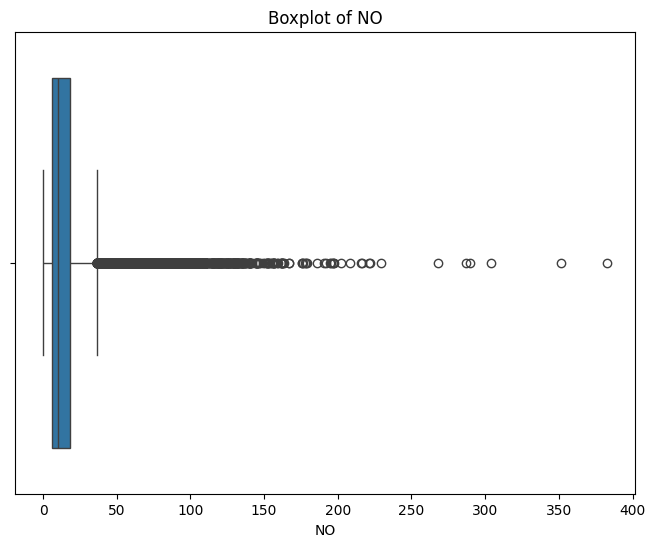

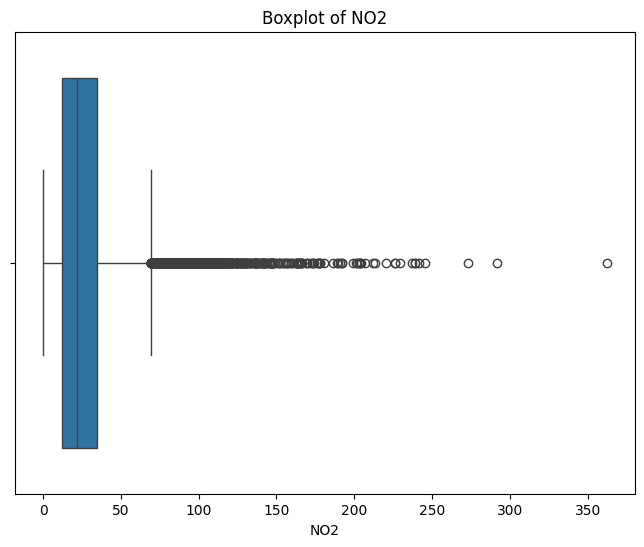

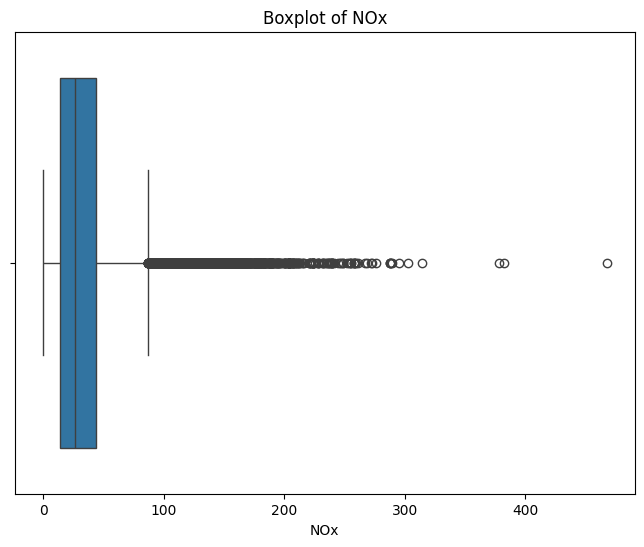

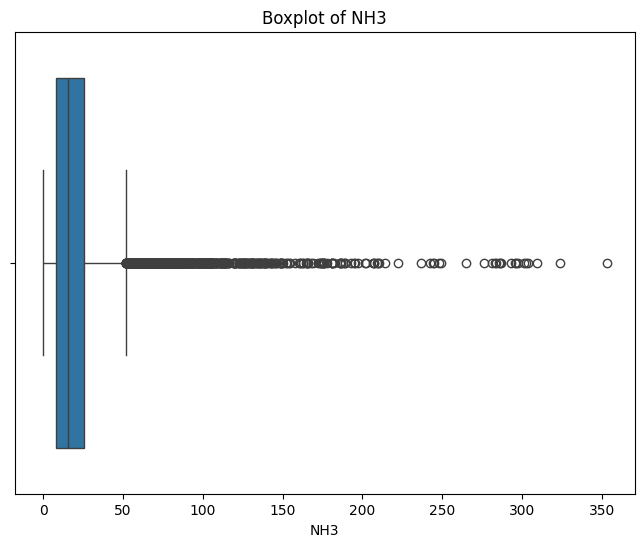

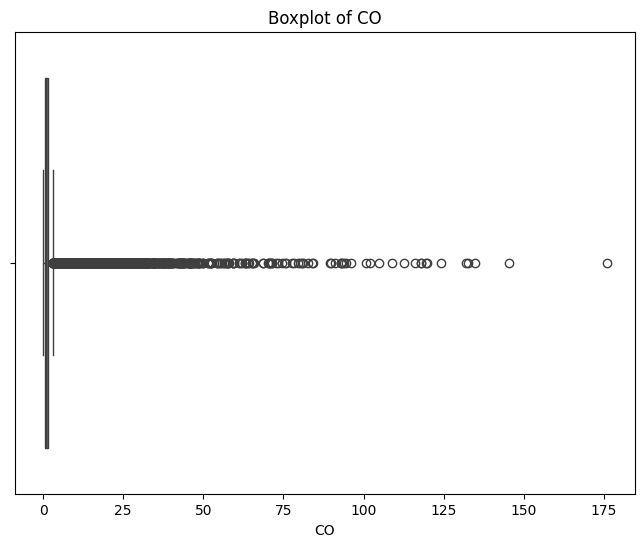

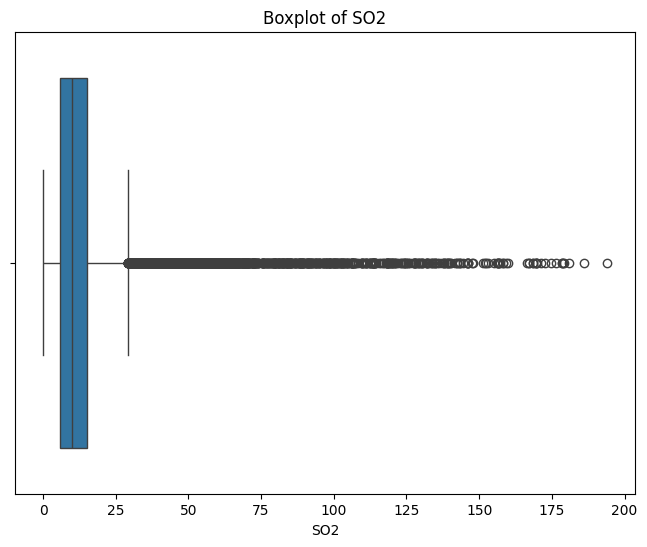

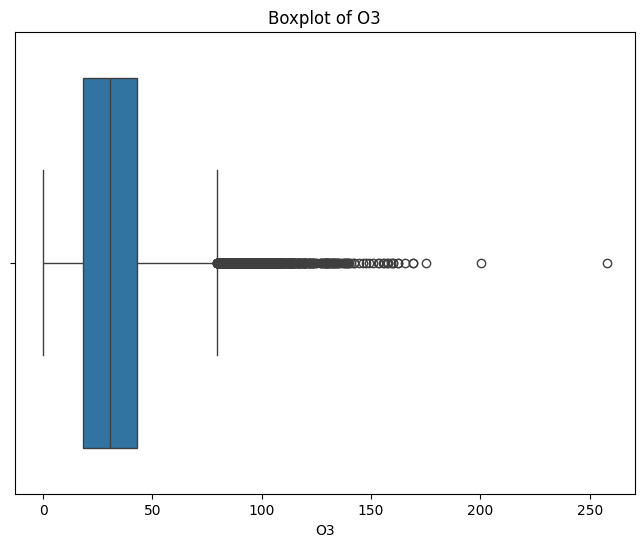

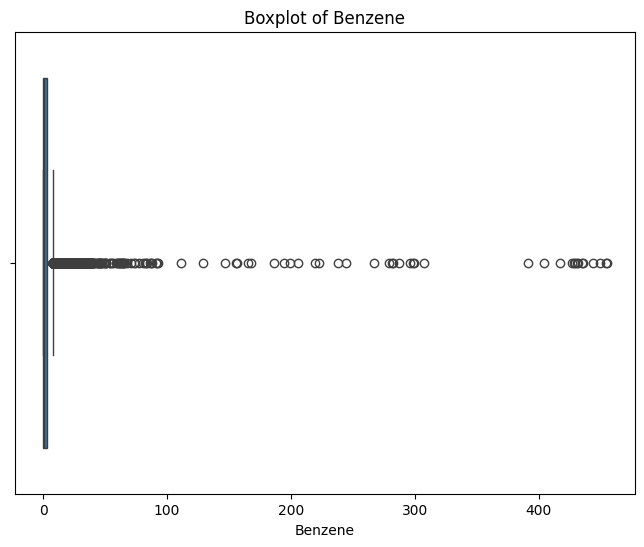

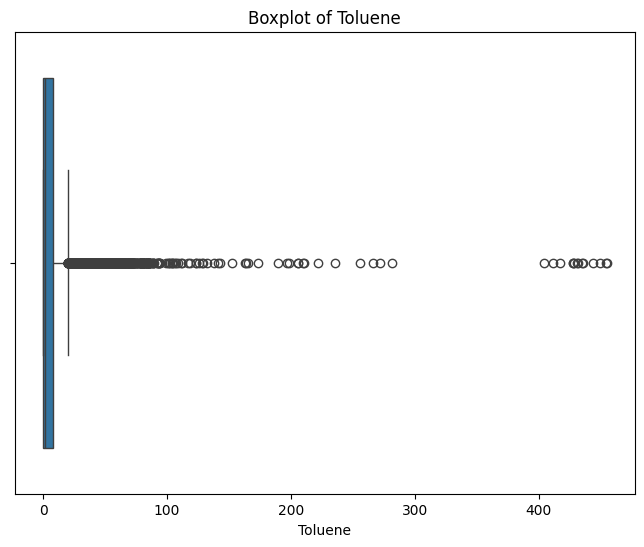

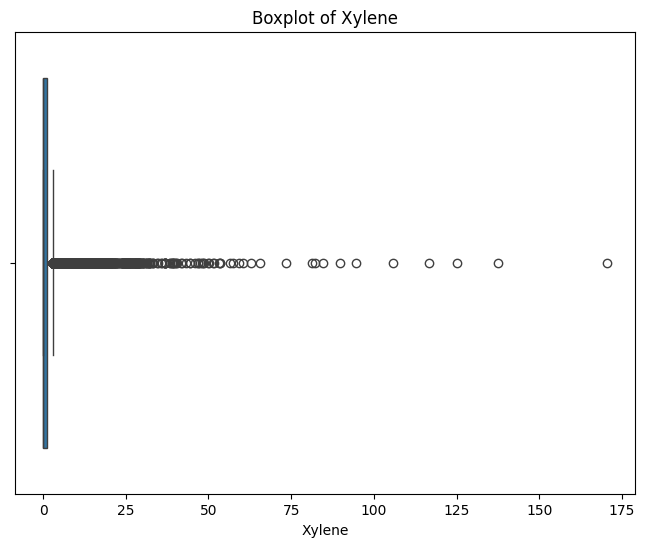

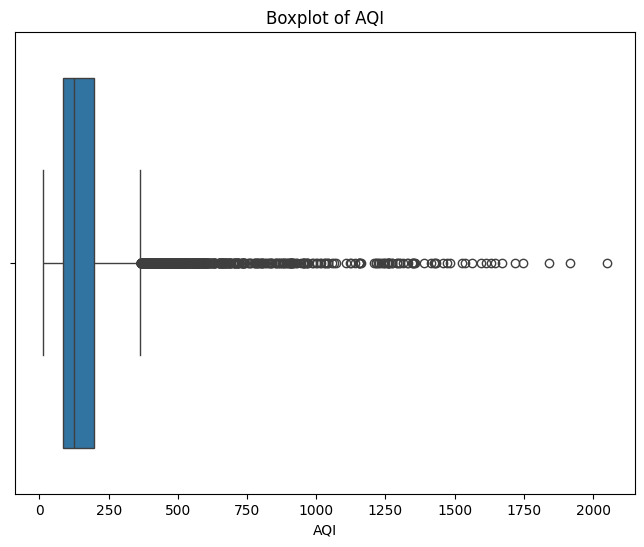

In [56]:
for i in x_train.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x_train[i])
    plt.title(f'Boxplot of {i}')
    plt.show()


In [59]:
for i in x_train.columns:
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr = percentile75-percentile25
    print(f"25th percentile of {i} is {percentile25}\n75th percentile of {i} is {percentile75}\n IQR for {i} is {iqr}")


25th percentile of PM2.5 is 28.82
75th percentile of PM2.5 is 80.59
 IQR for PM2.5 is 51.77
25th percentile of PM10 is 56.254999999999995
75th percentile of PM10 is 149.745
 IQR for PM10 is 93.49000000000001
25th percentile of NO is 5.63
75th percentile of NO is 19.95
 IQR for NO is 14.32
25th percentile of NO2 is 11.75
75th percentile of NO2 is 37.62
 IQR for NO2 is 25.869999999999997
25th percentile of NOx is 12.82
75th percentile of NOx is 40.1275
 IQR for NOx is 27.307499999999997
25th percentile of NH3 is 8.58
75th percentile of NH3 is 30.02
 IQR for NH3 is 21.439999999999998
25th percentile of CO is 0.51
75th percentile of CO is 1.45
 IQR for CO is 0.94
25th percentile of SO2 is 5.67
75th percentile of SO2 is 15.22
 IQR for SO2 is 9.55
25th percentile of O3 is 18.86
75th percentile of O3 is 45.57
 IQR for O3 is 26.71
25th percentile of Benzene is 0.12
75th percentile of Benzene is 3.08
 IQR for Benzene is 2.96
25th percentile of Toluene is 0.6
75th percentile of Toluene is 9.15
 

In [78]:
def outlier_removal(x):
    X_new = x.copy()
    for col in x.columns:
            percentile25 = X_new[col].quantile(0.25)
            percentile75 = X_new[col].quantile(0.75)
            iqr = percentile75 - percentile25
            upper_limit = percentile75 + 1.5 * iqr
            lower_limit = percentile25 - 1.5 * iqr
            X_new[col] = np.where((X_new[col] < lower_limit) | (X_new[col] > upper_limit), np.nan, X_new[col])
    return X_new



            



In [76]:
x_train.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [80]:
x_train = outlier_removal(x_train)

In [81]:
x_train.describe

<bound method NDFrame.describe of            PM2.5       PM10         NO        NO2        NOx        NH3  \
0      66.596000  164.87800  10.476000  10.206000  16.480000   6.600000   
1      45.530000  150.21000   3.500000  48.130000  27.740000  12.680000   
2      21.080000   61.16200  17.590000  10.270000   4.220000   0.222000   
3      54.950000        NaN  10.346000  15.632000  68.160000   8.880000   
4      41.540000   77.54800   6.520000  10.280000  10.120000   7.488000   
...          ...        ...        ...        ...        ...        ...   
20666  21.750000   52.25200   7.970000  18.640000  16.240000   2.020000   
20667  38.060000   74.54000   9.910000  42.230000  22.620000  24.316000   
20668  67.370498  117.24589  17.594952  28.555084  32.434384  23.295002   
20669  36.080000   95.82000   5.670000  31.210000  18.750000  15.340000   
20670  65.290000  121.72000  23.970000  36.280000  59.590000  34.630000   

             CO        SO2         O3   Benzene    Toluene  Xylen

In [82]:
X_new = x_train.copy()
for col in x.columns:
            percentile25 = X_new[col].quantile(0.25)
            percentile75 = X_new[col].quantile(0.75)
            iqr = percentile75 - percentile25
            upper_limit = percentile75 + 1.5 * iqr
            lower_limit = percentile25 - 1.5 * iqr
            X_new[col] = np.where((X_new[col] < lower_limit) | (X_new[col] > upper_limit), np.nan, X_new[col])

x_test = X_new

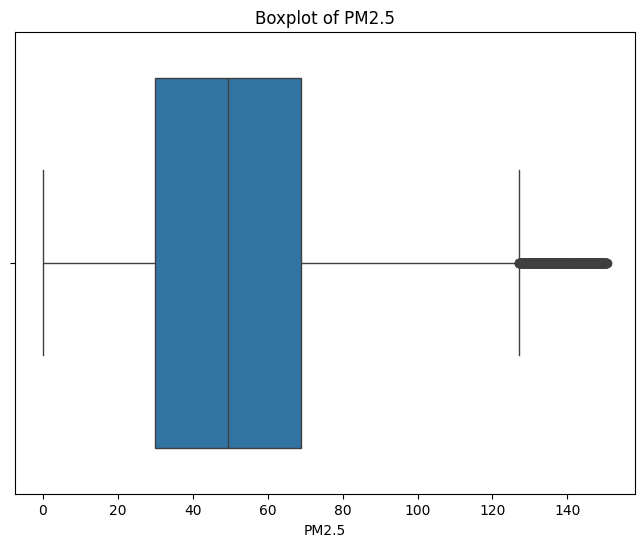

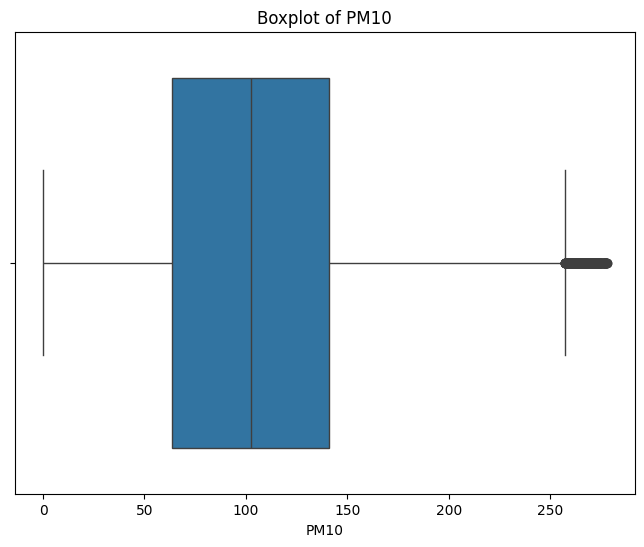

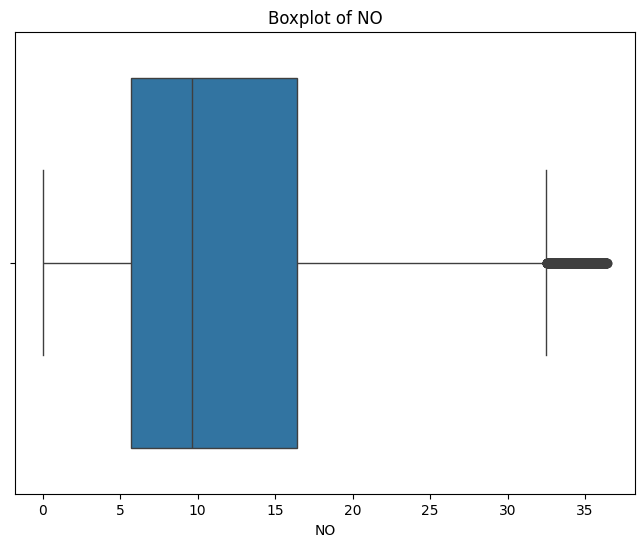

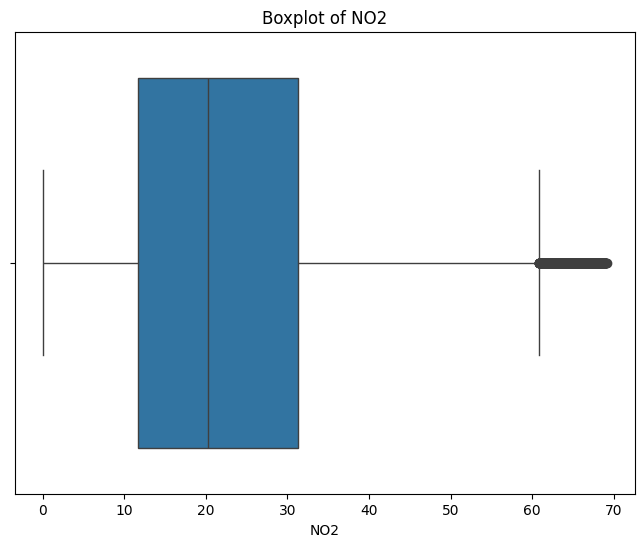

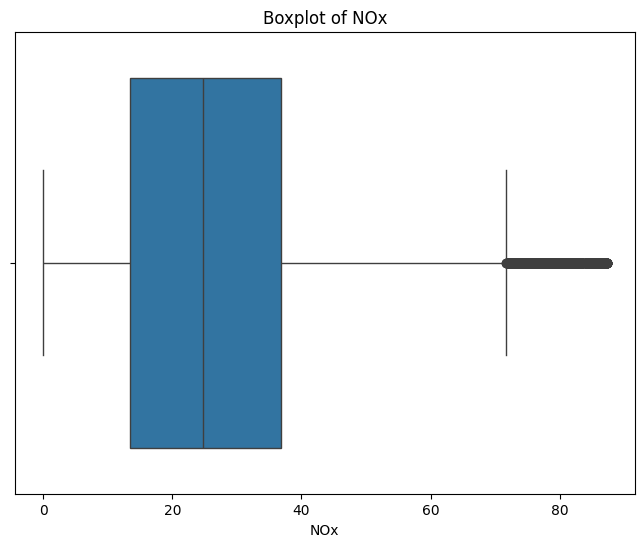

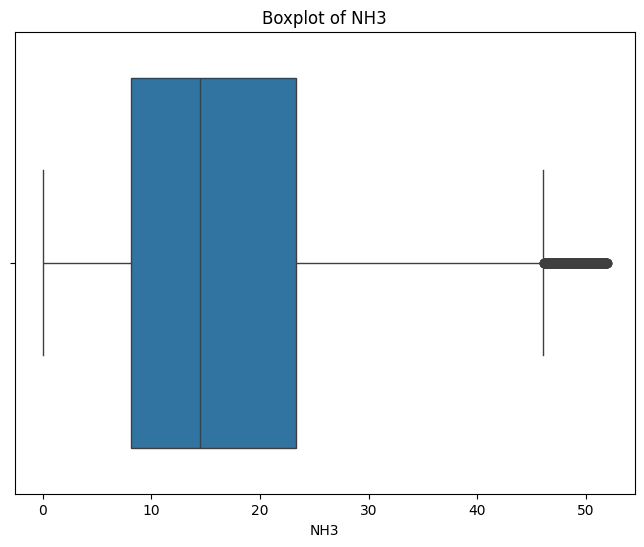

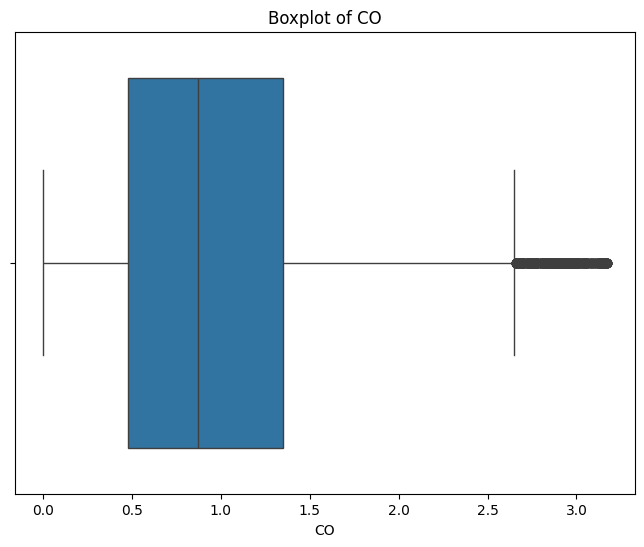

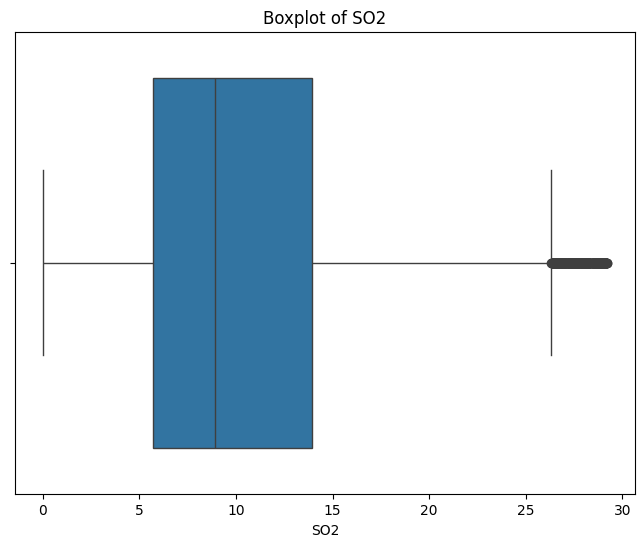

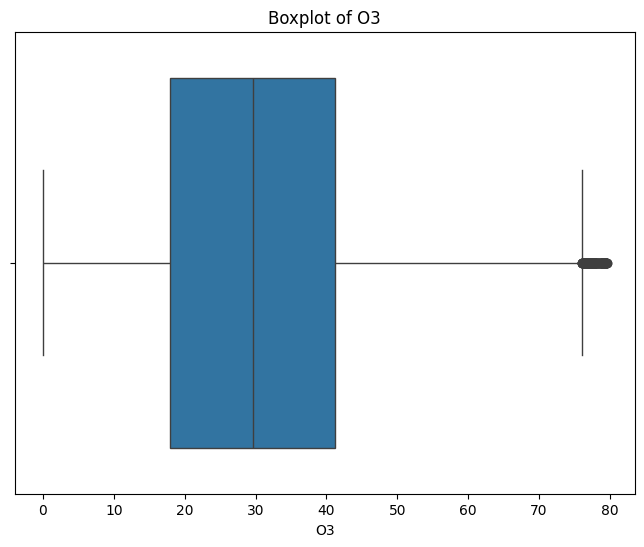

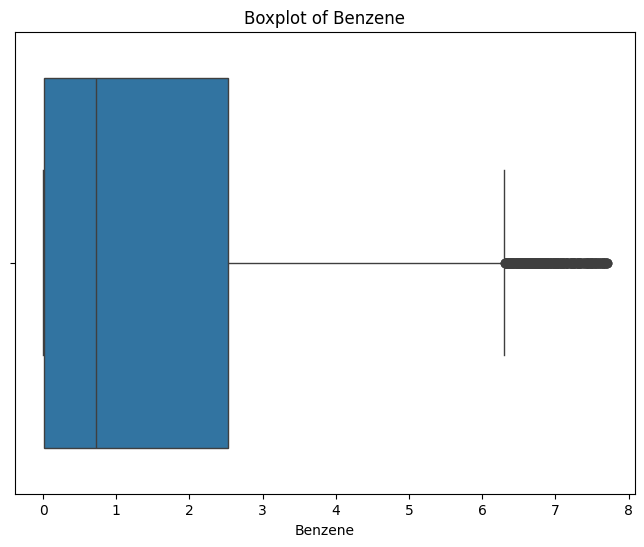

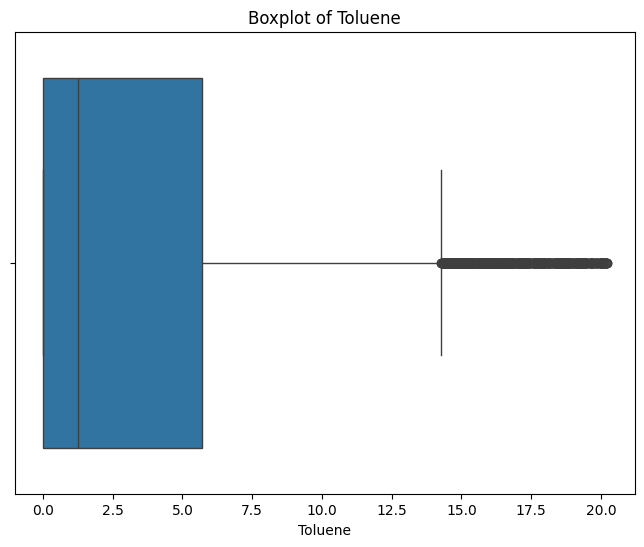

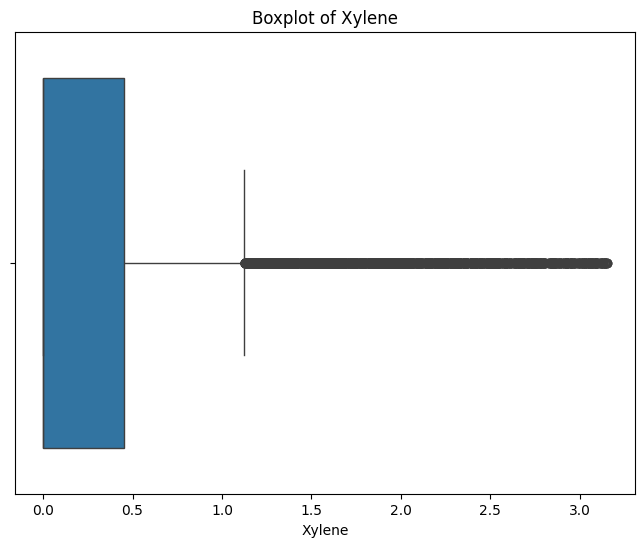

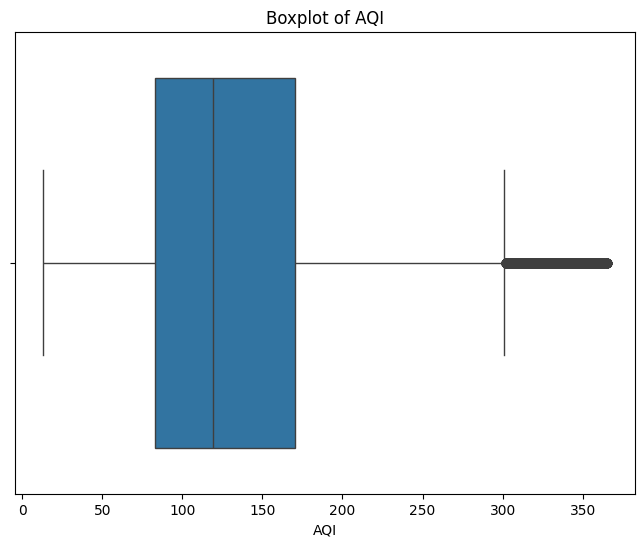

In [83]:
for i in x_train.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x_train[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

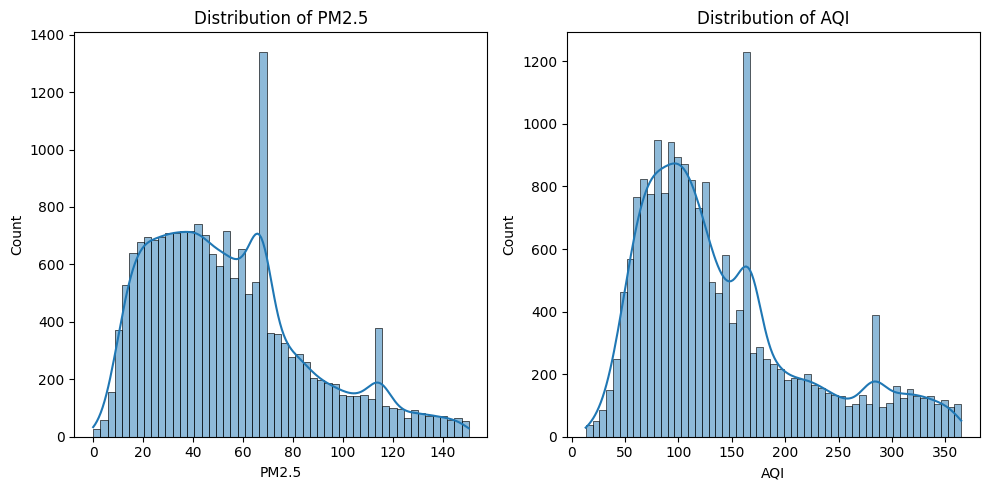

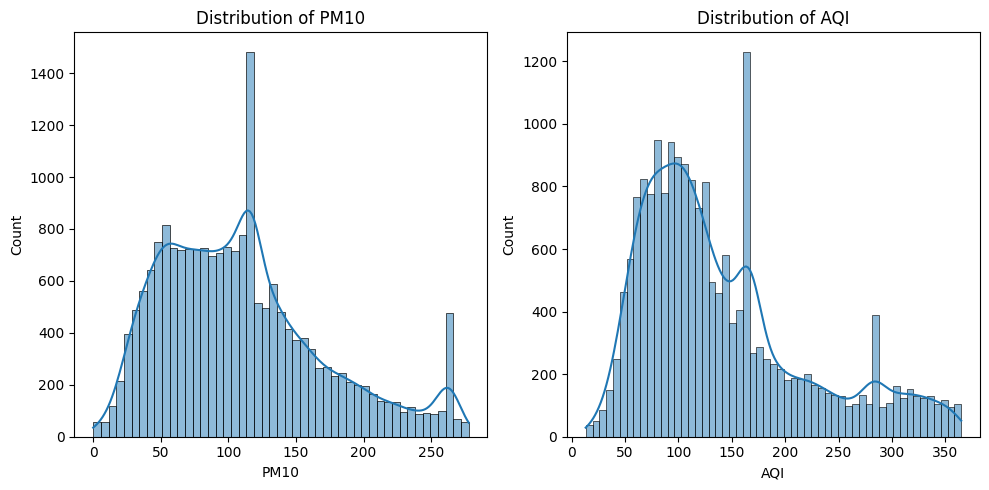

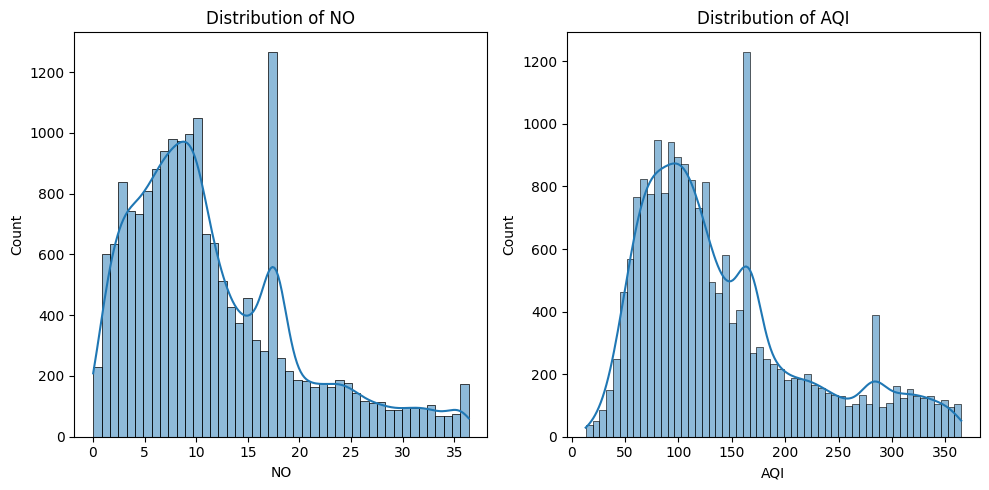

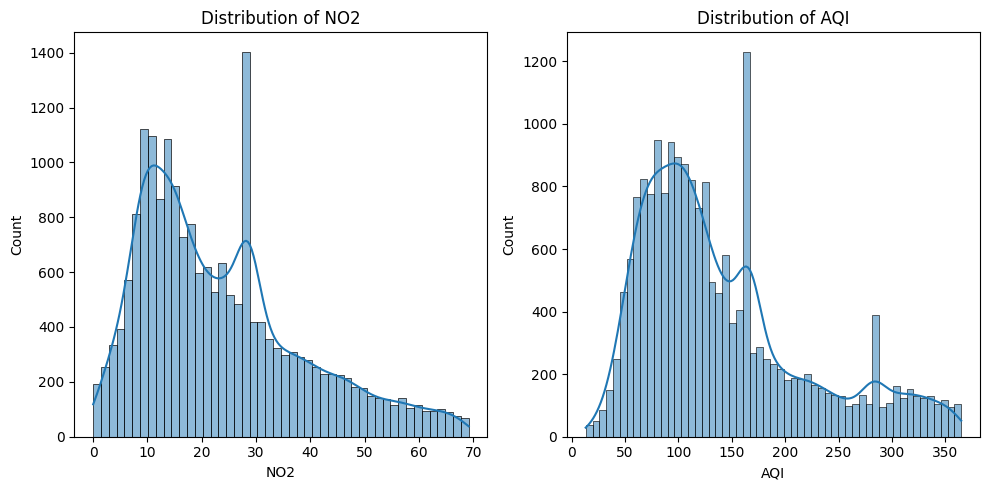

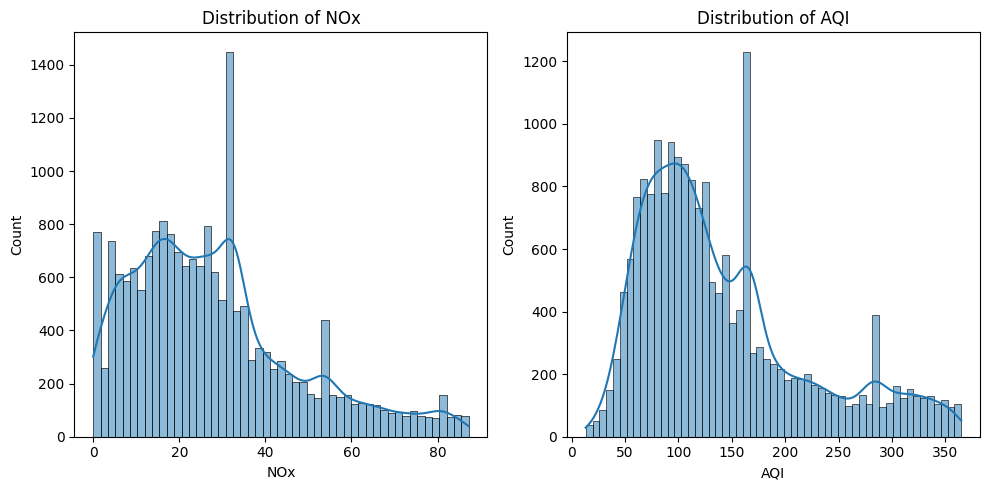

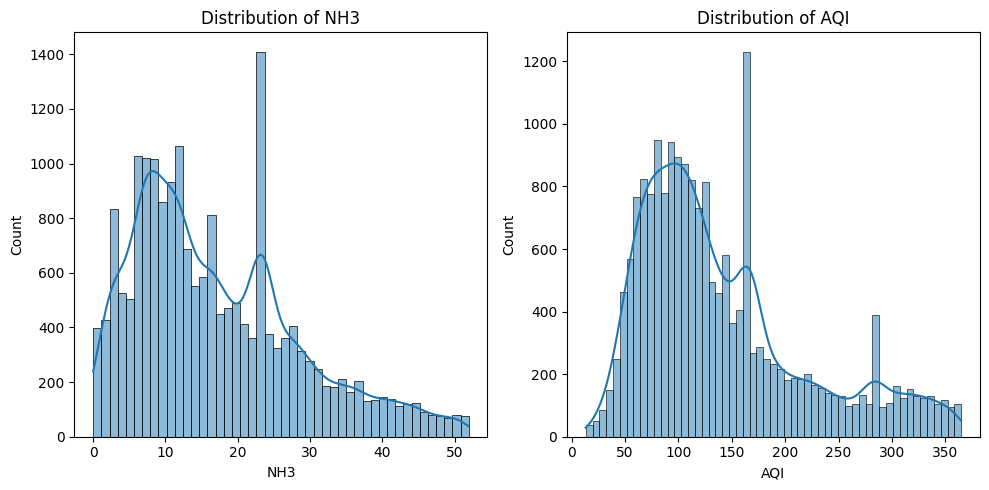

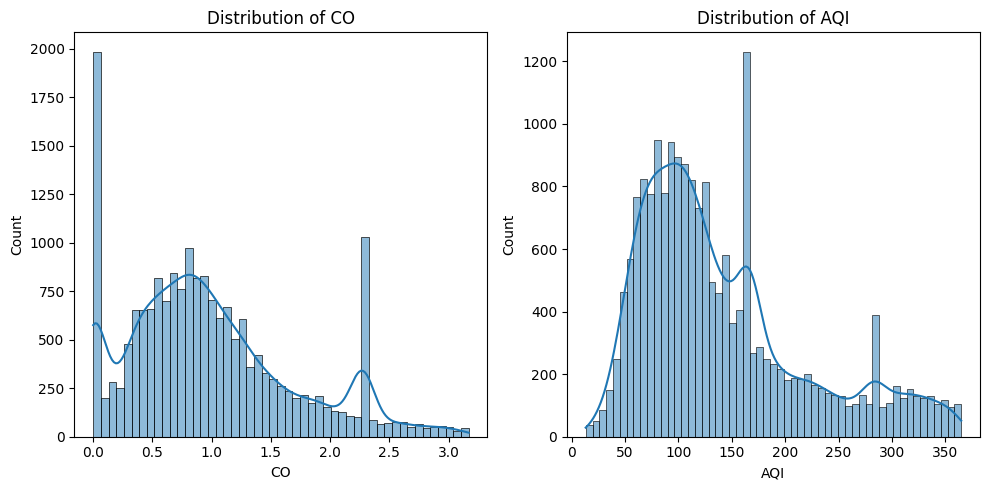

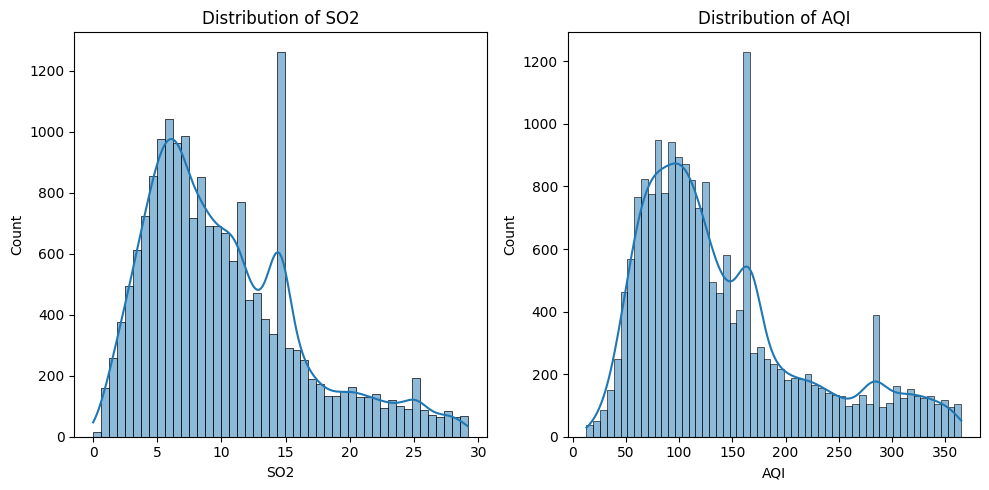

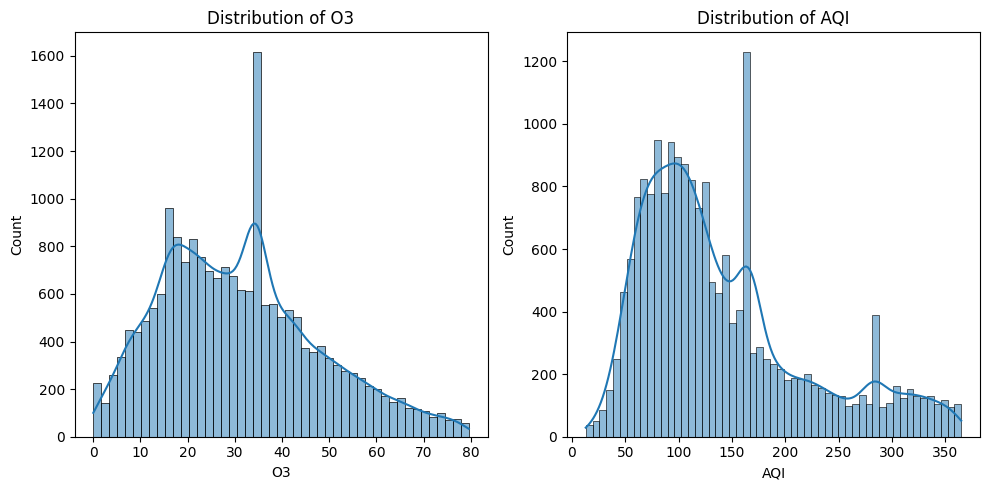

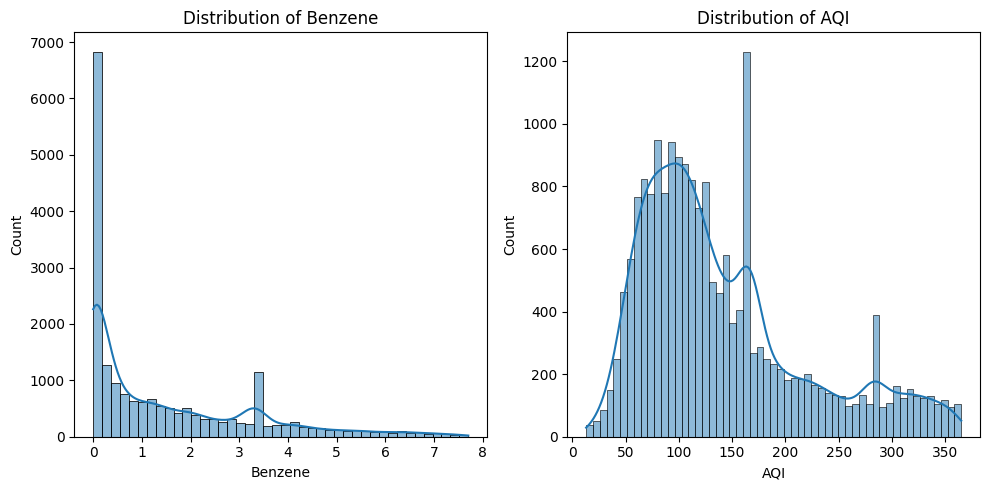

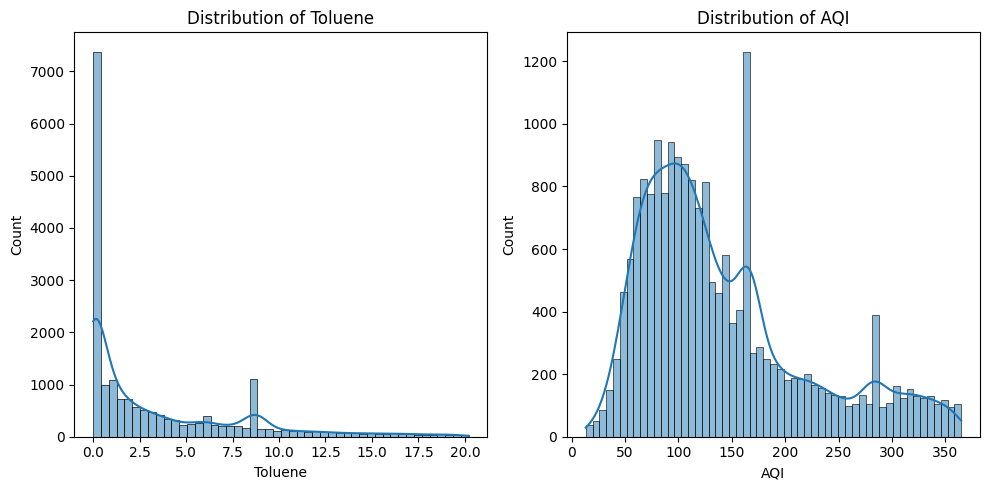

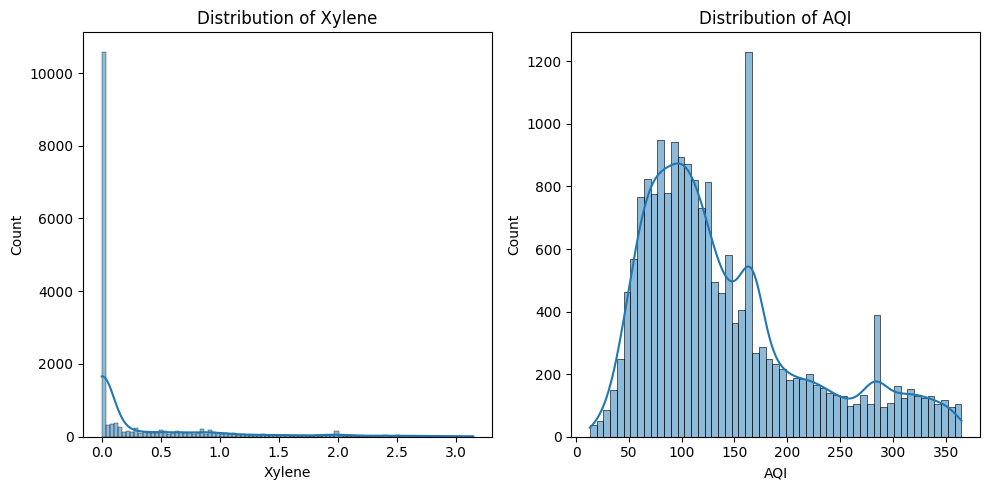

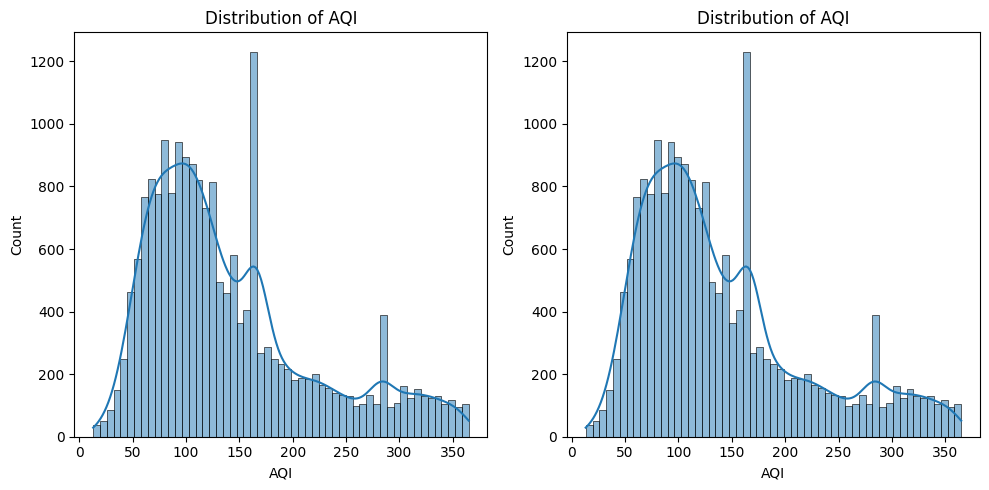

In [84]:
for i in x_train.columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(x_train[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.subplot(1, 2, 2)
    sns.histplot(x_train['AQI'], kde=True)
    plt.title('Distribution of AQI')   
    plt.tight_layout()
    plt.show()

In [88]:
y_train.shape

(17401, 1)

In [89]:
x_train.shape

(20671, 13)

In [86]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

ValueError: Number of labels=17401 does not match number of samples=20671